## 🌍 World Happiness Report

The **World Happiness Report** is an annual publication by the United Nations Sustainable Development Solutions Network. It ranks countries based on how happy their citizens perceive themselves to be, using survey data from the Gallup World Poll and several socio-economic indicators.

The report goes beyond just GDP or economic success — it includes factors that reflect **social, health, and emotional well-being**, such as:

- GDP per Capita (economic performance)
- Social Support (relationships, networks)
- Healthy Life Expectancy
- Freedom to Make Life Choices
- Generosity
- Perceptions of Corruption

Each of these is weighted and contributes to a country’s overall **Happiness Score**, which ranges from 0 to 10.

In this project, I analyze this dataset to understand what drives happiness globally, how it varies by country and development status, and what patterns emerge across time.


## 🧭 Project Overview & Objectives

This project is a comprehensive data analysis of the World Happiness Report covering data from **2005 to 2024**.

The main goals are:
- To understand what factors influence happiness most strongly across countries.
- To identify what the happiest countries in the world have in common.
- To explore if there's a difference between developed and developing countries in what drives happiness.

To do this, we apply techniques like:
- Exploratory Data Analysis (EDA)
- Correlation and regression exploration
- Aggregation and grouping
- Data cleaning and joining
- Visualization and interpretation


## 🎯 Research Questions

1. **Which variables most significantly predict happiness scores globally?**  
   *Do features like GDP, freedom, and trust correlate strongly with happiness across all countries?*


3. **Are developing and developed countries fundamentally different in what drives happiness?**  
   *We categorize countries and compare trends to find whether economic status influences the key drivers of happiness.*


In [31]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

sns.set(style='whitegrid')

## 📂 Step 1: Load and Inspect the Data

We start by loading the dataset and previewing its structure. We confirm:

- There are **4000 rows** and **24 columns**
- Data types include integers, floats, and strings
- Key columns like `Country`, `Year`, and `Happiness_Score` are present
- No missing values are found, making the dataset clean and ready to analyze


In [32]:
# Load data
df = pd.read_csv("world_happiness_report.csv")

In [33]:
# Show basic info and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    4000 non-null   object 
 1   Year                       4000 non-null   int64  
 2   Happiness_Score            4000 non-null   float64
 3   GDP_per_Capita             4000 non-null   float64
 4   Social_Support             4000 non-null   float64
 5   Healthy_Life_Expectancy    4000 non-null   float64
 6   Freedom                    4000 non-null   float64
 7   Generosity                 4000 non-null   float64
 8   Corruption_Perception      4000 non-null   float64
 9   Unemployment_Rate          4000 non-null   float64
 10  Education_Index            4000 non-null   float64
 11  Population                 4000 non-null   int64  
 12  Urbanization_Rate          4000 non-null   float64
 13  Life_Satisfaction          4000 non-null   float

,Country,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,...,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
0,China,2022,4.39,44984.68,0.53,71.11,0.41,-0.05,0.83,14.98,...,0.34,76.44,46.06,8.92,62.75,8.59,74.40,70.30,0.29,61.38
1,UK,2015,5.49,30814.59,0.93,63.14,0.89,0.04,0.84,19.46,...,0.72,53.38,46.43,4.43,53.11,8.76,91.74,73.32,0.76,80.18
2,Brazil,2009,4.65,39214.84,0.03,62.36,0.01,0.16,0.59,16.68,...,0.23,82.40,31.03,3.78,33.30,6.06,71.80,28.99,0.94,72.65
3,France,2019,5.20,30655.75,0.77,78.94,0.98,0.25,0.63,2.64,...,0.68,46.87,57.65,4.43,90.59,6.36,86.16,45.76,0.48,55.14
4,China,2022,7.28,30016.87,0.05,50.33,0.62,0.18,0.92,7.70,...,0.50,60.38,28.54,7.66,59.33,3.00,71.10,65.67,0.12,51.55


## 🔍 Step 2: Exploratory Data Analysis (EDA)

EDA helps us understand the range and distribution of our data. We perform:

- **Descriptive statistics** using `.describe()`
- **Value counts** for the `Country` column
- **Histograms** for all numeric columns to check data spread
- **Correlation heatmap** to reveal relationships

These steps help us form hypotheses about what affects happiness most.

In [34]:
# Summary statistics
df.describe()

,Year,Happiness_Score,GDP_per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom,Generosity,Corruption_Perception,Unemployment_Rate,Education_Index,...,Public_Trust,Mental_Health_Index,Income_Inequality,Public_Health_Expenditure,Climate_Index,Work_Life_Balance,Internet_Access,Crime_Rate,Political_Stability,Employment_Rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2014.670750,5.455005,30482.009953,0.505860,67.917605,0.502723,0.143960,0.498920,10.966748,0.750385,...,0.502812,69.976853,40.002648,6.009270,65.176380,5.987325,67.586327,45.526322,0.494105,74.021450
std,5.724075,1.427370,17216.122032,0.286202,10.172091,0.285219,0.200088,0.288866,5.210712,0.144819,...,0.289186,17.128536,11.634987,2.291172,19.981357,1.725363,15.769023,20.300069,0.293191,13.906888
min,2005.000000,3.000000,1009.310000,0.000000,50.000000,0.000000,-0.200000,0.000000,2.000000,0.500000,...,0.000000,40.000000,20.010000,2.010000,30.010000,3.000000,40.010000,10.030000,0.000000,50.000000
25%,2010.000000,4.237500,15425.125000,0.260000,59.177500,0.260000,-0.030000,0.240000,6.450000,0.630000,...,0.260000,55.580000,29.865000,4.040000,48.170000,4.460000,53.910000,27.840000,0.230000,61.867500
50%,2015.000000,5.430000,29991.255000,0.510000,68.015000,0.500000,0.140000,0.500000,10.995000,0.750000,...,0.500000,69.650000,40.015000,6.070000,64.755000,6.020000,68.015000,45.760000,0.490000,74.475000
75%,2020.000000,6.662500,45763.085000,0.750000,76.690000,0.750000,0.310000,0.742500,15.450000,0.880000,...,0.760000,84.582500,50.187500,8.010000,82.652500,7.490000,81.332500,63.197500,0.760000,85.912500
max,2024.000000,8.000000,59980.720000,1.000000,85.000000,1.000000,0.500000,1.000000,19.990000,1.000000,...,1.000000,100.000000,59.970000,10.000000,99.990000,9.000000,94.990000,79.990000,1.000000,98.000000


In [35]:
# Value counts of a categorical column
country_value_counts = df['Country'].value_counts()
country_value_counts.head(10)

Country
USA             429
France          415
Germany         413
Brazil          404
Australia       400
India           399
UK              395
Canada          386
South Africa    385
China           374
Name: count, dtype: int64

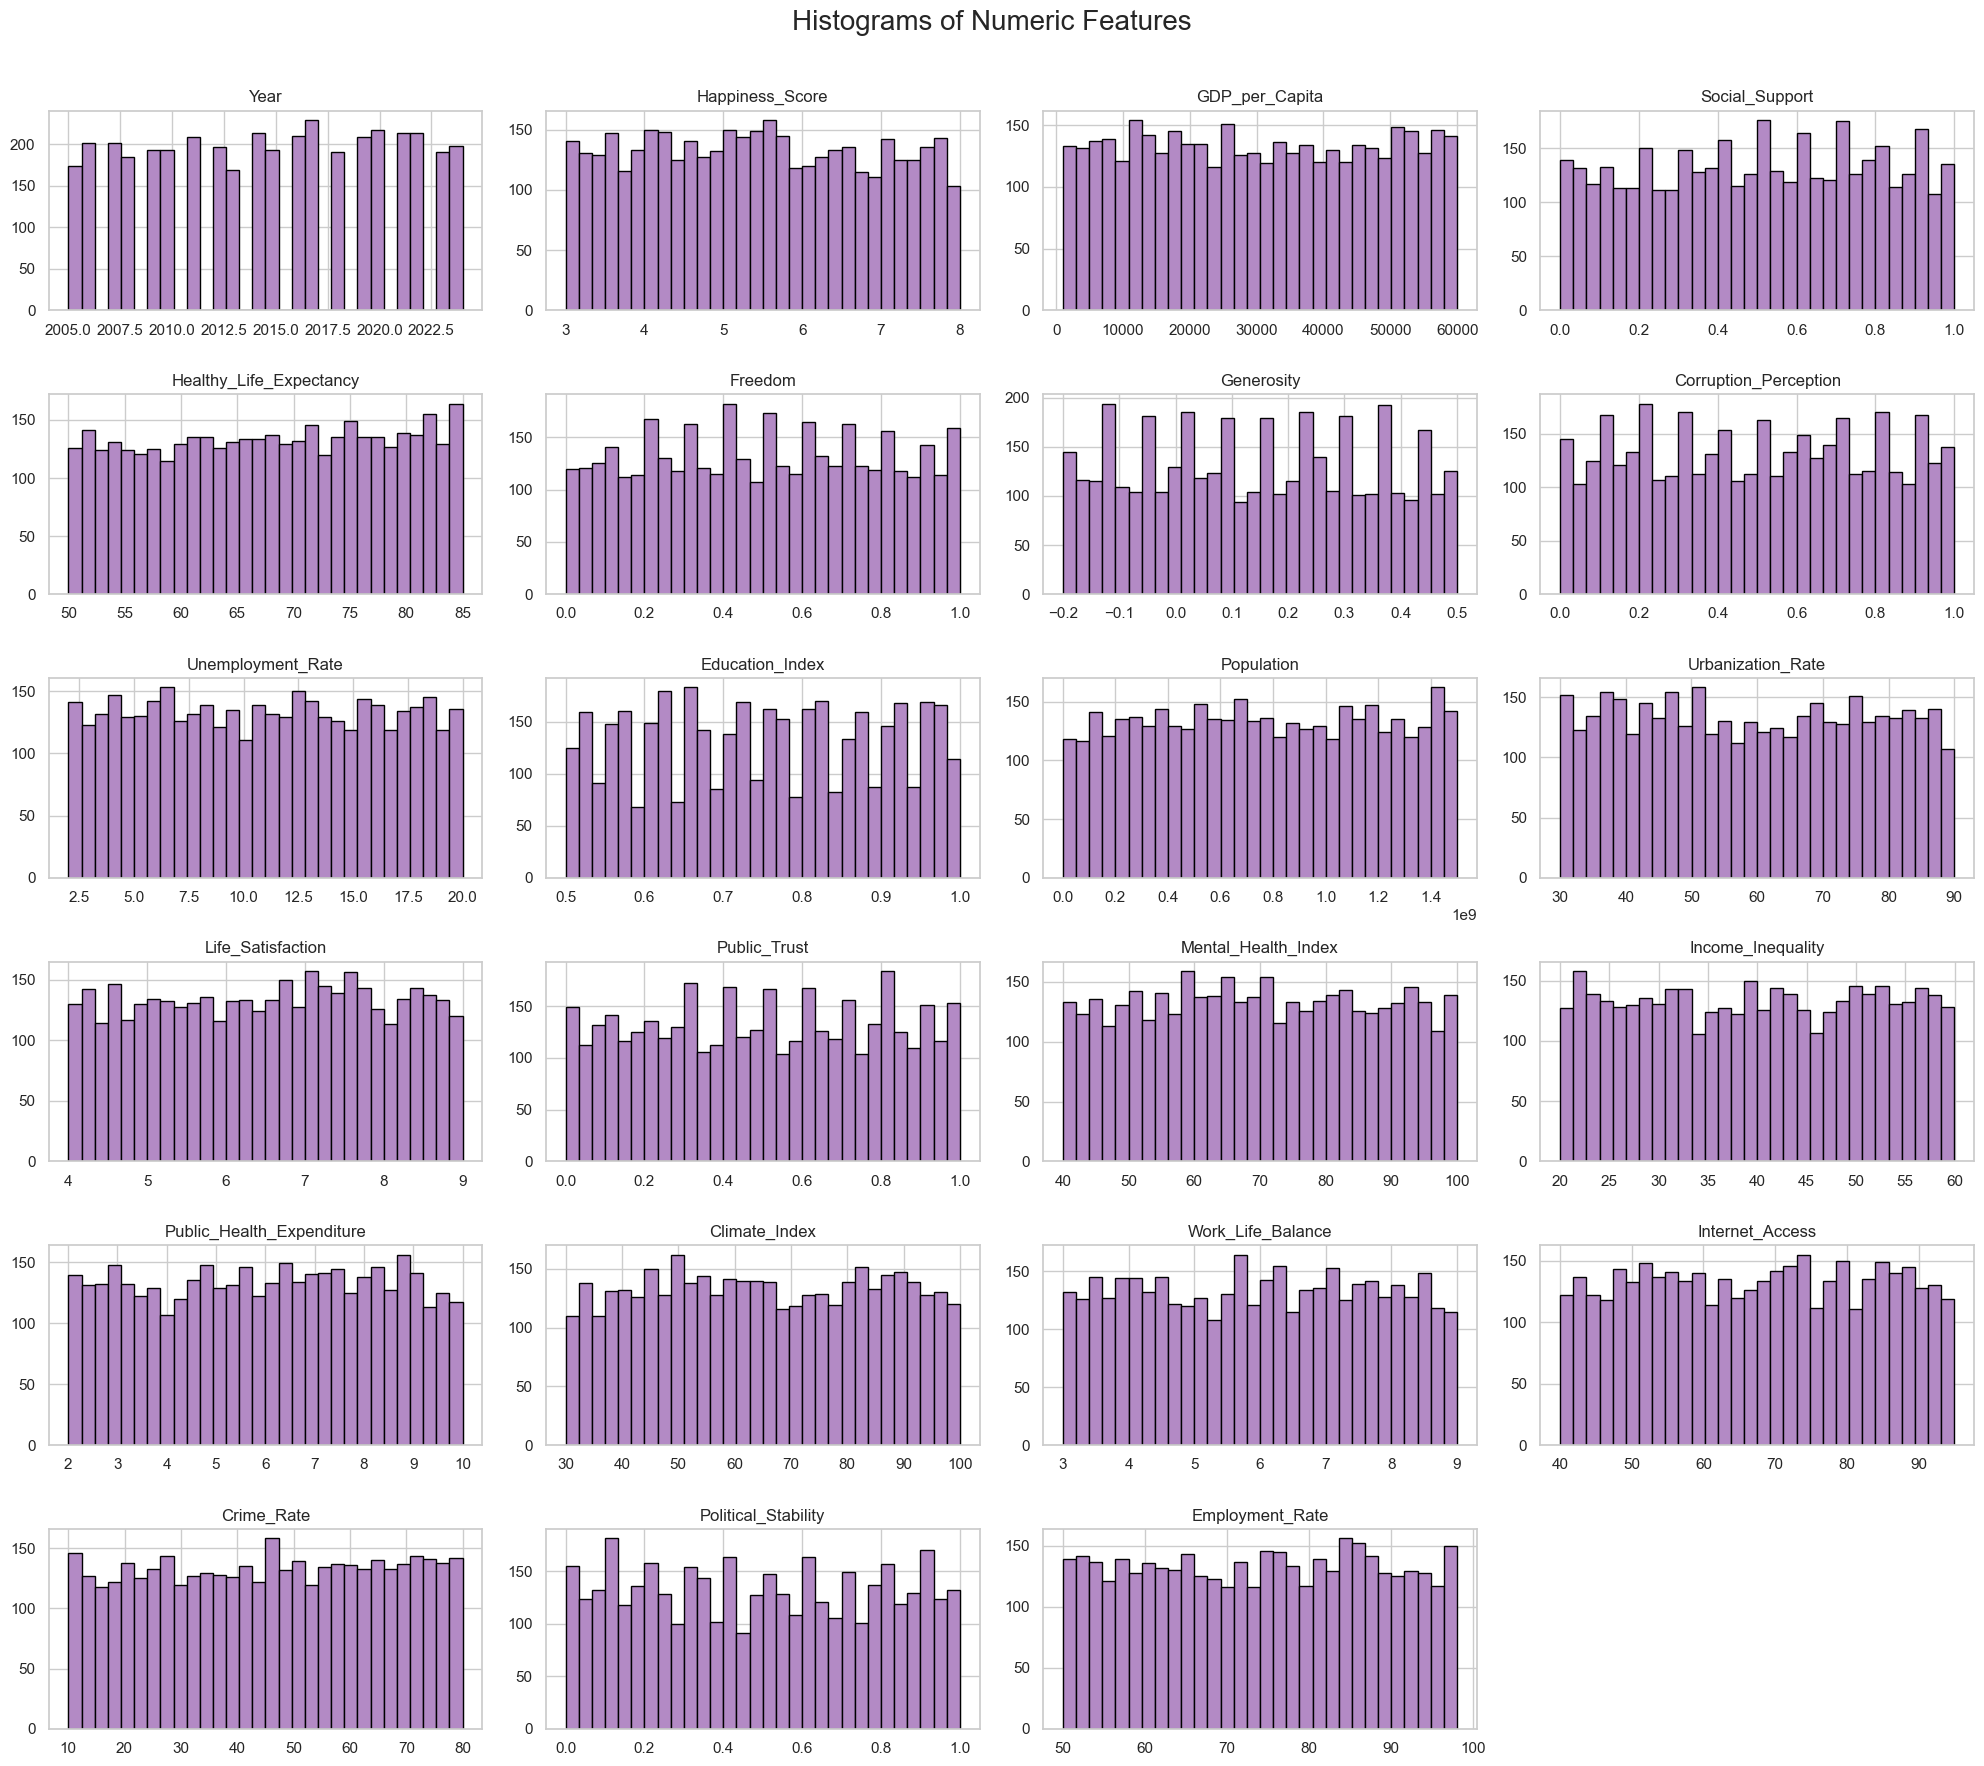

In [36]:
# Histograms of numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
df[numeric_columns].hist(
    figsize=(20, 18), 
    bins=30, 
    layout=(6, 4), 
    edgecolor='black',
    color='#b38ac5'
    )
plt.suptitle("Histograms of Numeric Features", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


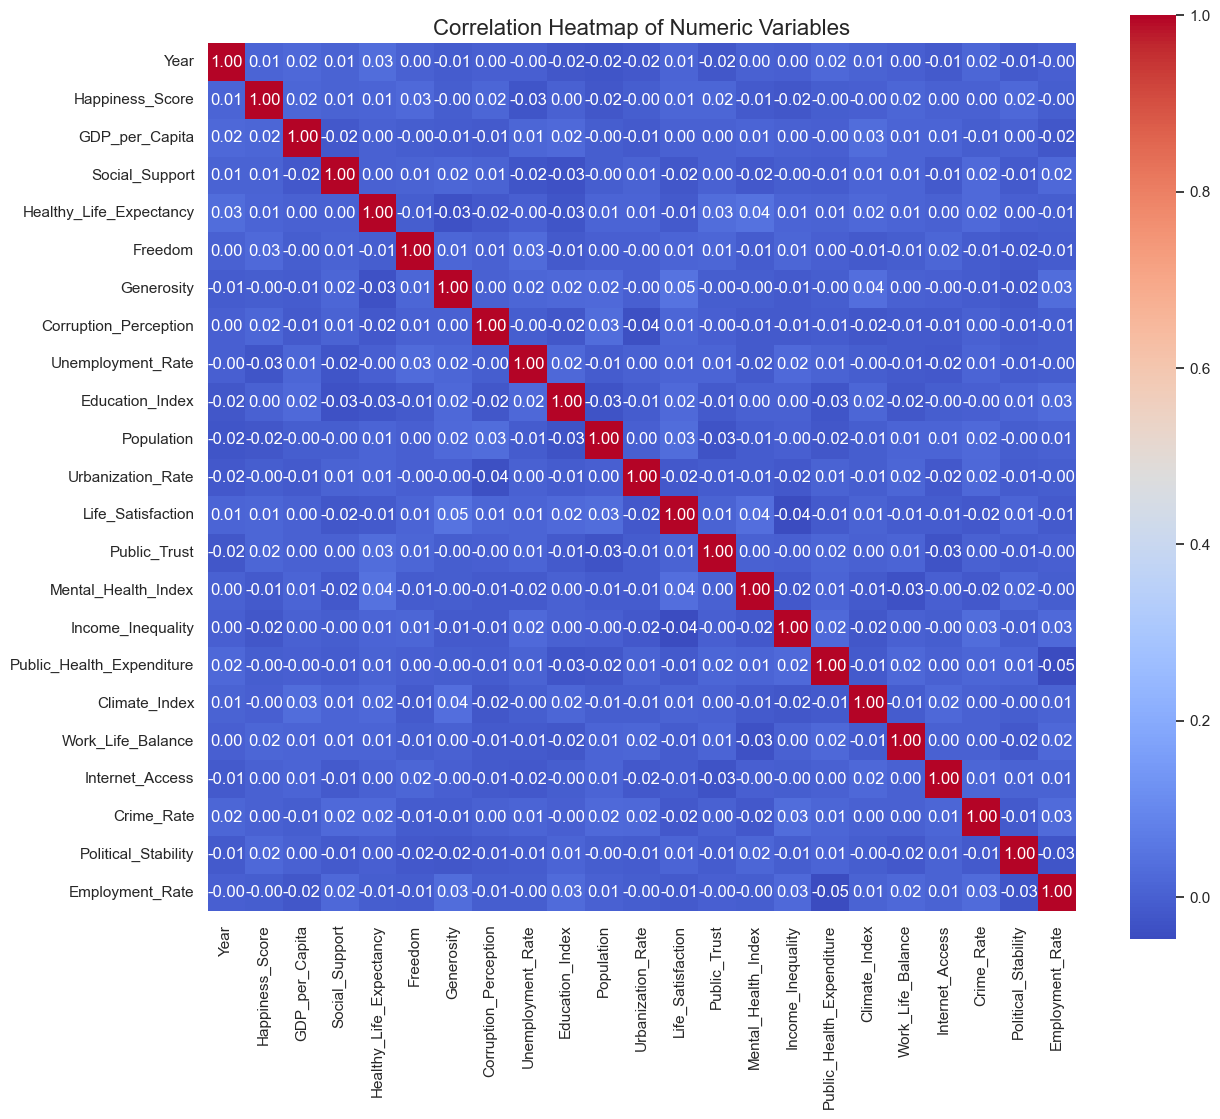

In [37]:
# Set up the plot for correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.show()

## 🧼 Step 3: Data Cleaning

To ensure analysis accuracy, we check:

- Data types and convert `Year` to datetime
- Missing values — none found
- Negative values in features like Generosity — acceptable due to normalization
- Outliers using IQR — no extreme values that need removal

The dataset is well-structured and requires minimal cleaning.


In [38]:
# Check for missing values
df.isnull().sum()

Country                      0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        0
Unemployment_Rate            0
Education_Index              0
Population                   0
Urbanization_Rate            0
Life_Satisfaction            0
Public_Trust                 0
Mental_Health_Index          0
Income_Inequality            0
Public_Health_Expenditure    0
Climate_Index                0
Work_Life_Balance            0
Internet_Access              0
Crime_Rate                   0
Political_Stability          0
Employment_Rate              0
dtype: int64

In [39]:
# Create a new column 'Year_dt' as datetime for potential future time-based analysis
df['Year_dt'] = pd.to_datetime(df['Year'], format='%Y')

df[['Year', 'Year_dt']].head(10)

,Year,Year_dt
0,2022,2022-01-01
1,2015,2015-01-01
2,2009,2009-01-01
3,2019,2019-01-01
4,2022,2022-01-01
5,2006,2006-01-01
6,2015,2015-01-01
7,2017,2017-01-01
8,2008,2008-01-01
9,2011,2011-01-01


In [40]:
# Detect and remove outliers using IQR for key numeric features
outlier_columns = ['Happiness_Score', 'GDP_per_Capita', 'Unemployment_Rate', 'Crime_Rate']

# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers one column at a time
cleaned_df = df.copy()
for col in outlier_columns:
    cleaned_df = remove_outliers_iqr(cleaned_df, col)

# Report how many rows were removed
rows_removed = df.shape[0] - cleaned_df.shape[0]
cleaned_df.shape, rows_removed


((4000, 25), 0)

## 🔗 Step 4: Data Joining

To explore differences between developed and developing countries, we:

- Create a small mapping table of countries with their development status
- Join it to the main dataset using a left merge on `Country`

This adds a new categorical variable: `Development_Status`, used in grouped analysis later.


In [41]:
# Create and join development status table in one go
dev_status_df = pd.DataFrame({
    'Country': ['USA', 'France', 'Germany', 'Australia', 'UK', 'Canada', 'China', 'Brazil', 'India', 'South Africa'],
    'Development_Status': ['Developed'] * 6 + ['Developing'] * 4
})

# Merge with main dataframe
joined_df = df.merge(dev_status_df, on='Country', how='left')

# Fill missing values
joined_df['Development_Status'] = joined_df['Development_Status'].fillna('Other')

# Filter subsets
df_dev = joined_df[joined_df['Development_Status'] == 'Developed']
df_deving = joined_df[joined_df['Development_Status'] == 'Developing']


In [42]:
# Aggregation - Perform an aggregation on all data
overall_aggregates = df.agg({
    'Happiness_Score': ['mean', 'min', 'max'],
    'GDP_per_Capita': ['mean', 'min', 'max'],
    'Freedom': ['mean', 'min', 'max']
})
overall_aggregates

,Happiness_Score,GDP_per_Capita,Freedom
mean,5.455005,30482.009953,0.502723
min,3.000000,1009.310000,0.000000
max,8.000000,59980.720000,1.000000


## 🌟 Top 10 Happiest Countries by Average Score

This chart displays the top 10 countries with the highest average happiness scores from 2005 to 2024. The values are computed by averaging each country’s Happiness Score over all available years.

These countries consistently report higher levels of well-being, freedom, and life satisfaction compared to others making them global leaders in citizen happiness.


/var/folders/k_/ykbrkvx93sv78vy8zfdpnv240000gn/T/ipykernel_16562/2457507369.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_happiness.values, y=avg_happiness.index, palette='viridis')


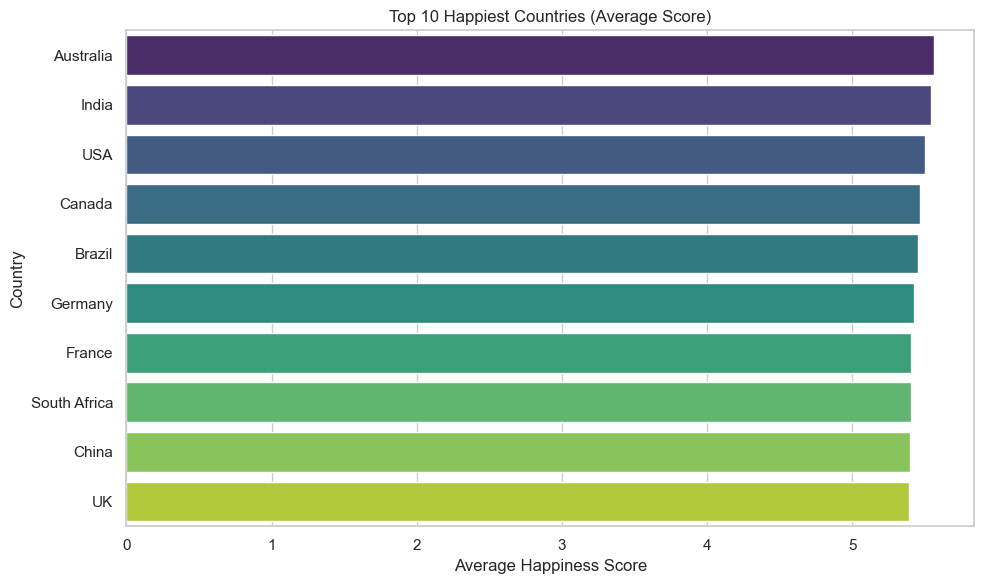

In [43]:
# Group by country and compute average happiness score
avg_happiness = df.groupby('Country')['Happiness_Score'].mean().sort_values(ascending=False).head(10)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_happiness.values, y=avg_happiness.index, palette='viridis')
plt.title('Top 10 Happiest Countries (Average Score)')
plt.xlabel('Average Happiness Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## 🌍 Global Happiness Trend (2005–2024)

This line chart shows how the **global Happiness Score** has changed over time. The values represent the yearly mean across all countries in the dataset.

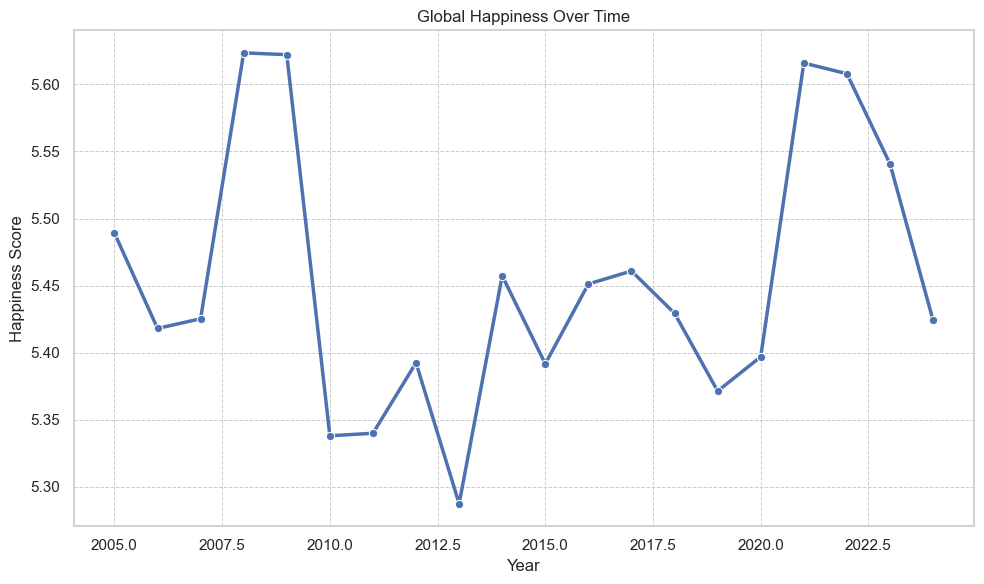

In [44]:
# Global trend
global_trend = df.groupby('Year')['Happiness_Score'].mean().reset_index()

# Plot it
plt.figure(figsize=(10, 6))
sns.lineplot(data=global_trend, x='Year', y='Happiness_Score', marker='o', linewidth=2.5)
plt.title("Global Happiness Over Time")
plt.ylabel("Happiness Score")
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


## How has happiness changed over time in the top 5 happiest countries?

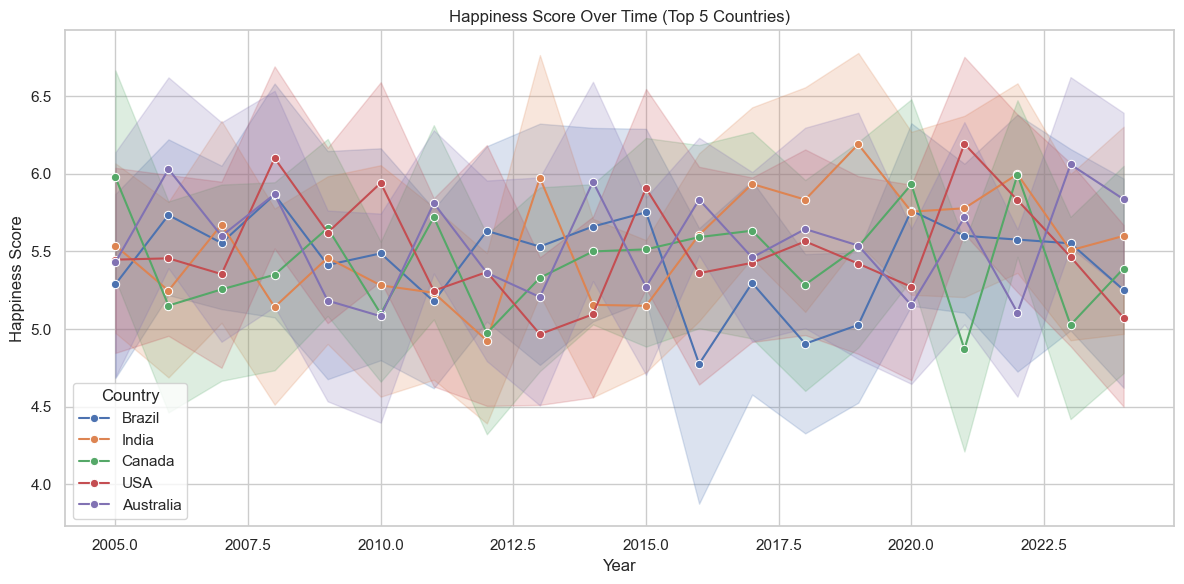

In [45]:
# First get top 5 happiest countries from earlier
top_5_countries = avg_happiness.head(5).index.tolist()

# Filter data
top5_df = df[df['Country'].isin(top_5_countries)]

# Plot lineplot of Happiness Score over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=top5_df, x='Year', y='Happiness_Score', hue='Country', marker='o')
plt.title('Happiness Score Over Time (Top 5 Countries)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


## 🌎 Regional Happiness Trends (2005–2024)

This line chart shows how **average happiness scores have changed over time across major global regions**. Each region's trend is calculated by averaging the Happiness Score of countries assigned to that region for each year.

By visualizing regional trends, we can observe:
- How consistent or volatile happiness is within each region
- Which regions have improved or declined in well-being over time
- Potential influence of local policies, conflicts, economic shifts, or cultural factors

This analysis supports deeper understanding of **geographic differences** in what drives happiness.


In [46]:
# Add region column to your DataFrame
region_map = {
    'USA': 'North America',
    'Canada': 'North America',
    'France': 'Europe',
    'Germany': 'Europe',
    'UK': 'Europe',
    'India': 'Asia',
    'China': 'Asia',
    'Brazil': 'South America',
    'South Africa': 'Africa',
    'Australia': 'Australia'
}

df['Region'] = df['Country'].map(region_map).fillna('Other')


/var/folders/k_/ykbrkvx93sv78vy8zfdpnv240000gn/T/ipykernel_16562/1419227953.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


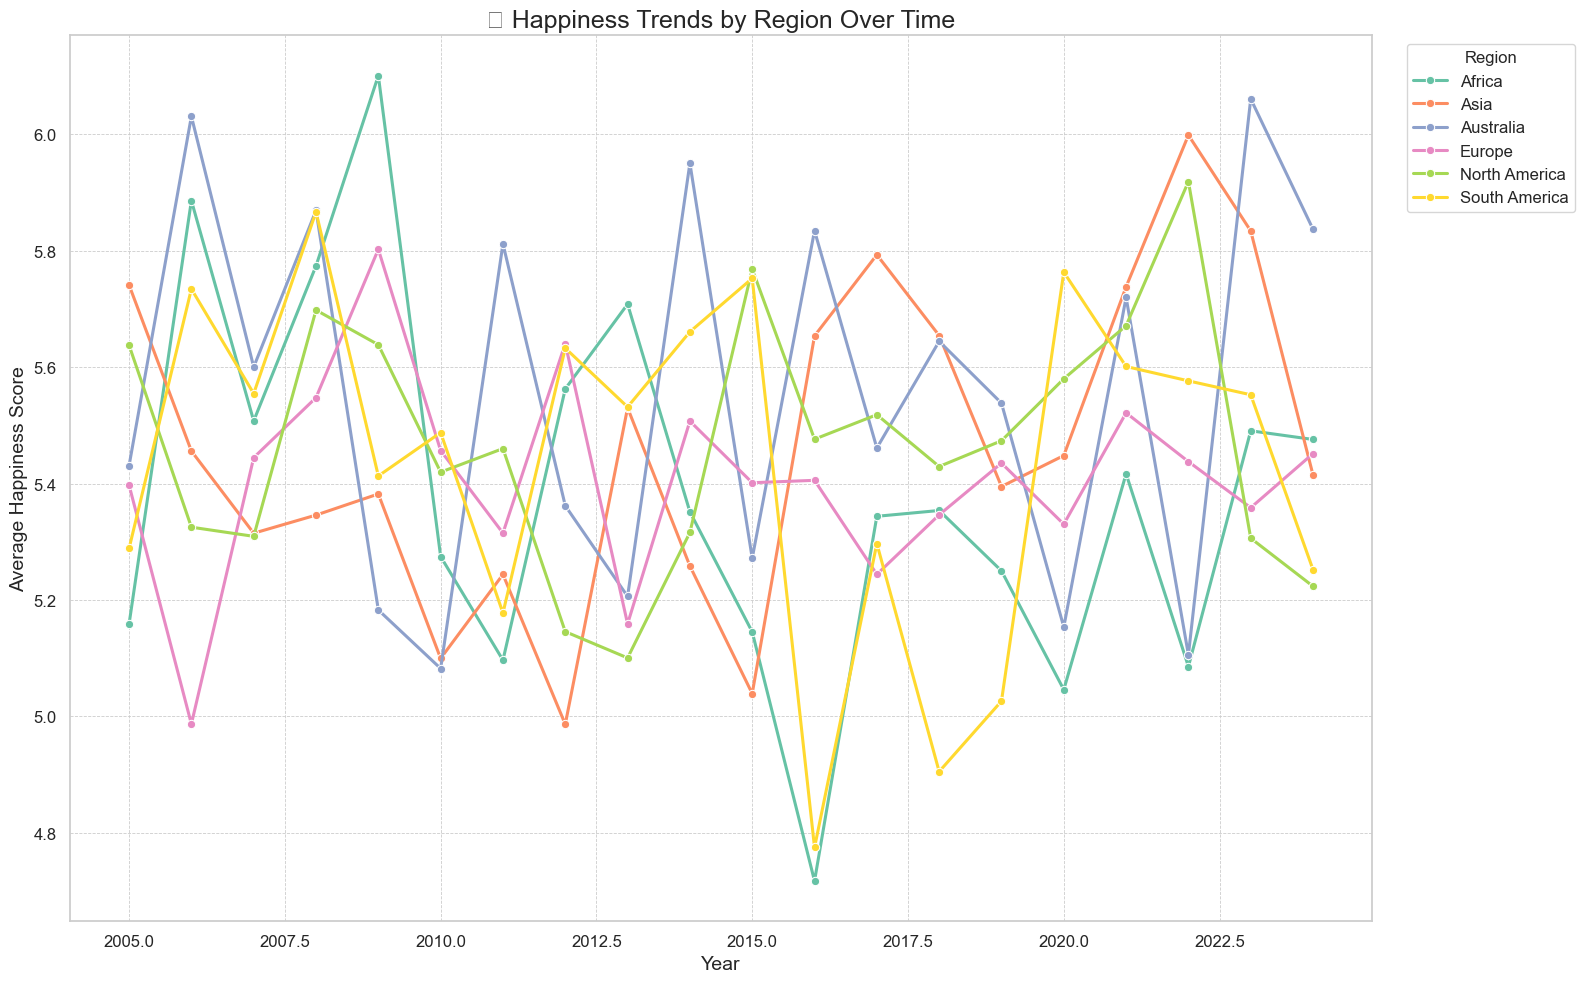

In [47]:
# Grouping the data
df_grouped = df.groupby(['Region', 'Year'])['Happiness_Score'].mean().reset_index()

# Bigger image
plt.figure(figsize=(16, 10))  # Wider and taller

sns.set_palette("Set2")  # Optional
sns.lineplot(
    data=df_grouped,
    x='Year',
    y='Happiness_Score',
    hue='Region',
    marker='o',
    linewidth=2.2
)

plt.title("📊 Happiness Trends by Region Over Time", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Happiness Score", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.6)
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## 🎯 Step 5: Which variables most significantly predict happiness scores globally?

We calculate the correlation of all features with `Happiness_Score`.

Top correlated variables include:
- Freedom
- Political Stability
- Corruption Perception 
- Public Trust
- Education Index

While none are very strong individually, they provide a direction for multivariate modeling in future work.


In [48]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Remove the target column
features_all = numeric_cols.drop('Happiness_Score')

# Define predictors (X) and target (y)
X = df[features_all]
y = df['Happiness_Score']

# Add intercept
X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X).fit()

# Show regression summary
# model.summary()


/var/folders/k_/ykbrkvx93sv78vy8zfdpnv240000gn/T/ipykernel_16562/750034615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm")


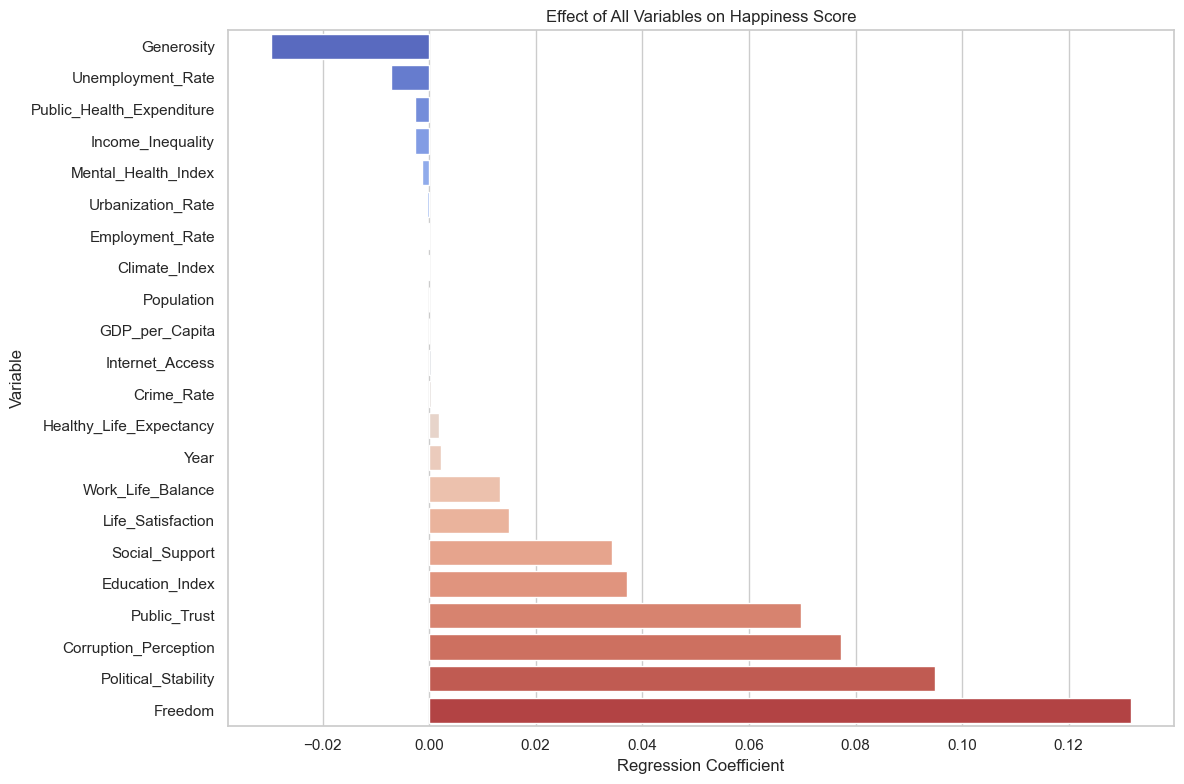

In [49]:
## Which variables most significantly predict happiness scores globally?
coefs = model.params.drop('const').sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm")
plt.title("Effect of All Variables on Happiness Score")
plt.xlabel("Regression Coefficient")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


## 🎯 Step 7: Are developing and developed countries fundamentally different in what drives happiness?

Using the `Development_Status` column, we create a pivot table showing average Happiness Score per year for both developed and developing countries.

Findings:
- Both groups follow similar trends
- Some years, developing countries report higher happiness
- This suggests happiness depends on more than just national income trust, freedom, and culture may also play big roles


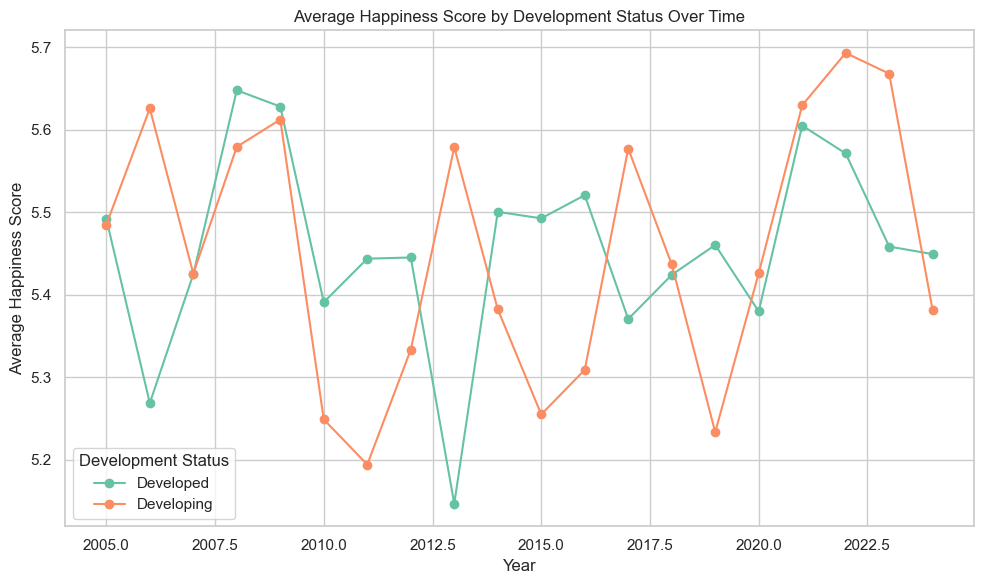

In [50]:
# Create pivot table: average Happiness Score by Year and Development Status
pivot_table = joined_df.pivot_table(
    values='Happiness_Score',
    index='Year',
    columns='Development_Status',
    aggfunc='mean'
)

# Plot the pivot table as a line chart
pivot_table.plot(figsize=(10, 6), marker='o')
plt.title('Average Happiness Score by Development Status Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.legend(title='Development Status')
plt.tight_layout()
plt.show()

# pivot_table.round(2)


In [51]:
# Developed Countries
corr_dev = df_dev.corr(numeric_only=True)['Happiness_Score'].sort_values(ascending=False)

# Developing Countries
corr_deving = df_deving.corr(numeric_only=True)['Happiness_Score'].sort_values(ascending=False)


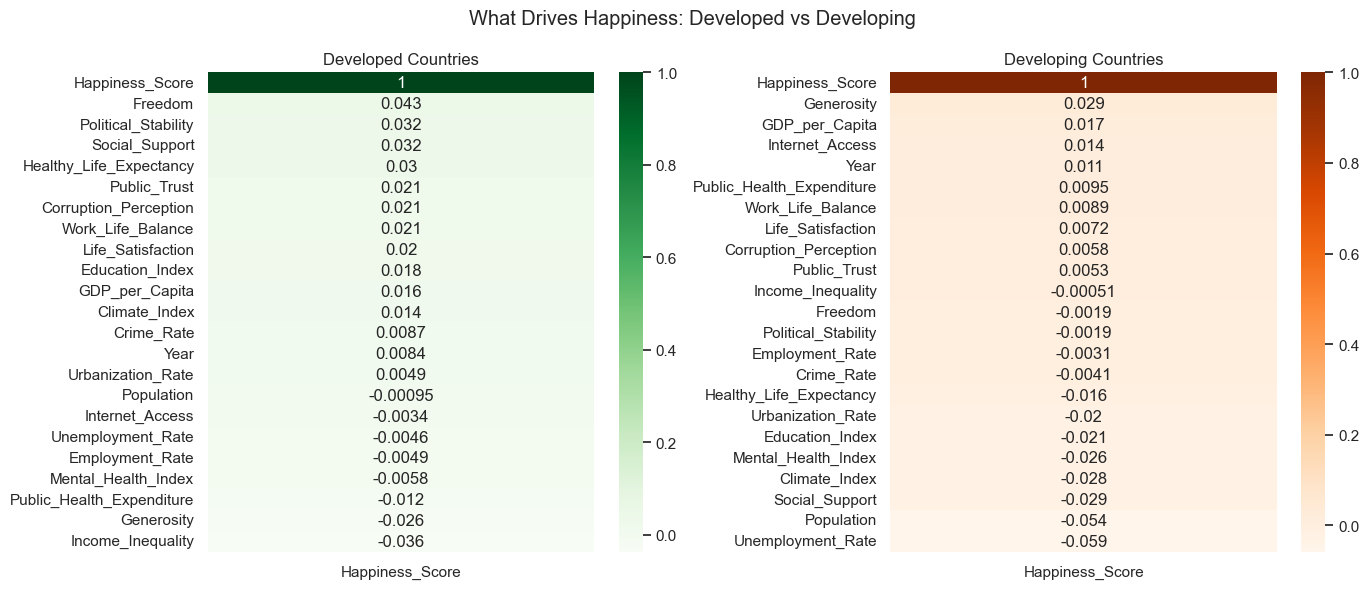

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Developed
sns.heatmap(
    df_dev.corr(numeric_only=True)[['Happiness_Score']].sort_values(by='Happiness_Score', ascending=False),
    annot=True, cmap='Greens', ax=axes[0]
)
axes[0].set_title('Developed Countries')

# Developing
sns.heatmap(
    df_deving.corr(numeric_only=True)[['Happiness_Score']].sort_values(by='Happiness_Score', ascending=False),
    annot=True, cmap='Oranges', ax=axes[1]
)
axes[1].set_title('Developing Countries')

plt.suptitle("What Drives Happiness: Developed vs Developing")
plt.tight_layout()
plt.show()


In [53]:
# Use joined_df which includes 'Development_Status'
numeric_cols = joined_df.select_dtypes(include=['float64', 'int64']).columns.drop('Happiness_Score')

df_dev = joined_df[joined_df['Development_Status'] == 'Developed']
df_deving = joined_df[joined_df['Development_Status'] == 'Developing']

corr_dev = df_dev[numeric_cols].corrwith(df_dev['Happiness_Score'])
corr_deving = df_deving[numeric_cols].corrwith(df_deving['Happiness_Score'])


In [54]:
# Combine into a single DataFrame
comparison_df = pd.DataFrame({
    'Feature': numeric_cols,
    'Developed': corr_dev.values,
    'Developing': corr_deving.values
}).set_index('Feature')


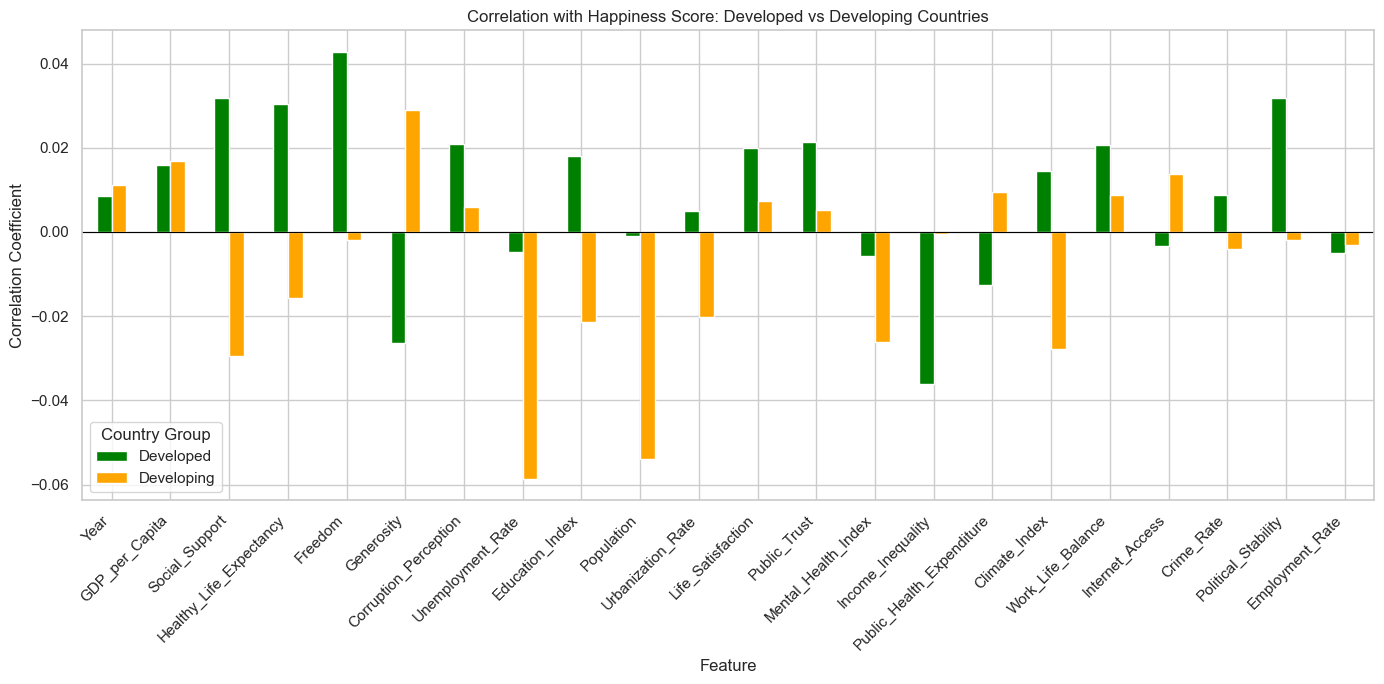

In [55]:
comparison_df.plot(kind='bar', figsize=(14, 7), color=['green', 'orange'])

plt.title("Correlation with Happiness Score: Developed vs Developing Countries")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title="Country Group")
plt.tight_layout()
plt.show()


In [56]:
# Prepare DataFrame with 3 columns: Feature, Group, Correlation
corr_df = pd.DataFrame({
    'Feature': numeric_cols.tolist(),
    'Developed': corr_dev.values,
    'Developing': corr_deving.values
})

# Melt for plotting
melted = corr_df.melt(id_vars='Feature', var_name='Group', value_name='Correlation')


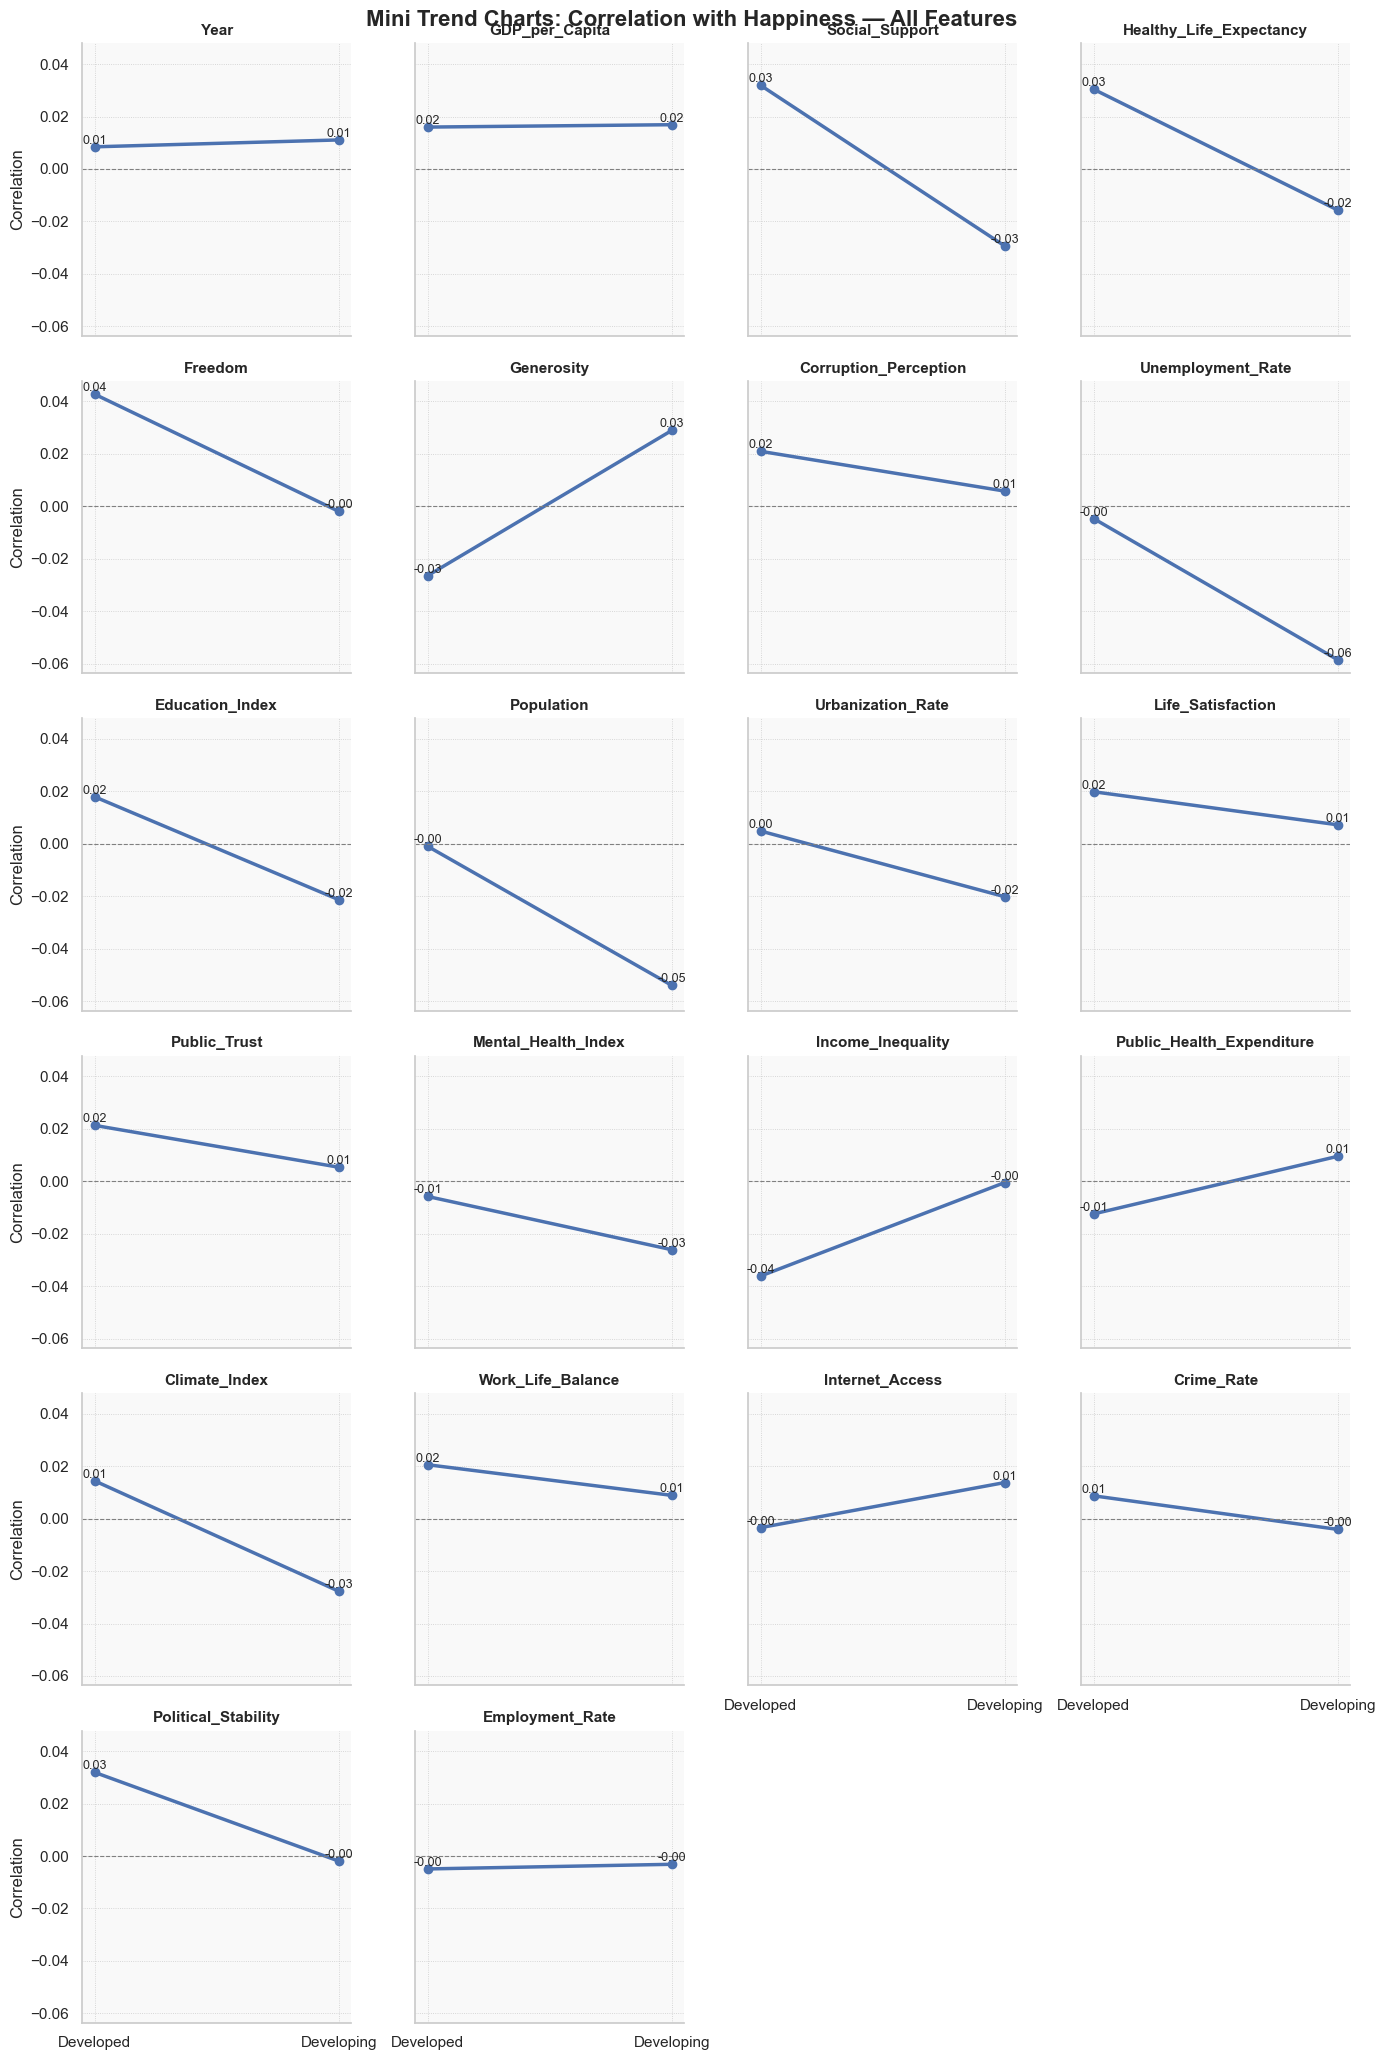

In [57]:
# Create FacetGrid using all features
g = sns.FacetGrid(data=melted, col="Feature", col_wrap=4, height=3.5, sharey=True)

# Custom function to manually draw the line + markers + value labels
def draw_line(data, **kwargs):
    x_vals = [0, 1]  # 0 = Developed, 1 = Developing
    # Sort so Developed is first, Developing is second
    data_sorted = data.sort_values(by='Group')
    y_vals = data_sorted['Correlation'].values

    # Draw line
    plt.plot(x_vals, y_vals, color="#4c72b0", linewidth=2.5, marker='o')

    # Add value labels
    plt.text(x_vals[0], y_vals[0], f"{y_vals[0]:.2f}", ha='center', va='bottom', fontsize=9)
    plt.text(x_vals[1], y_vals[1], f"{y_vals[1]:.2f}", ha='center', va='bottom', fontsize=9)

# Map the function to each mini chart
g.map_dataframe(draw_line)

# Tidy each subplot: x-labels, background, grid
for ax in g.axes.flat:
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Developed', 'Developing'])
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.set_facecolor("#f9f9f9")
    ax.grid(True, linestyle=":", linewidth=0.6)

# Titles and labels
g.set_titles(col_template="{col_name}", size=11, fontweight="bold")
g.set_axis_labels("", "Correlation")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Mini Trend Charts: Correlation with Happiness — All Features", fontsize=16, weight='bold')

plt.tight_layout()
plt.show()


## 🏁 Conclusion

- No single variable fully explains happiness, but **freedom**, **trust**, **GDP**, and **work-life balance** are key contributors.
- The **top 10 happiest countries** are high performers in both economic and social indicators.
- There is **no consistent advantage for developed countries** — developing countries can be just as happy, depending on non-material factors.

This analysis shows the complexity of happiness and opens up further questions about **policy, culture, and societal well-being**.

Future work could include:
- Regression modeling for prediction
- Clustering countries by happiness profile
- Analyzing regional patterns (e.g., continents or cultures)
